# Data Story Telling Project Submission

Looking at a data set, tell as story with data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data

We will be using a subset of a book ratings data set, segmenting it out for users who have submitted at least 10 ratings and books with at least 15 ratings. 

In [3]:
df_full = pd.read_pickle('df_final_formodel.pkl')

In [4]:
cutoff_users = 10
cutoff_books = 15

In [5]:
user_filter = df_full['user_id'].value_counts() > cutoff_users
uf = user_filter[user_filter].index.tolist()

In [6]:
book_filter = df_full['book_id'].value_counts() > cutoff_books
bf = book_filter[book_filter].index.tolist()

In [11]:
len(uf),len(bf)

(183178, 39071)

In [9]:
df = df_full[(df_full['user_id'].isin(uf)) & (df_full['book_id'].isin(bf))]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8585672 entries, 0 to 9514185
Data columns (total 25 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   user_id                    object 
 1   book_id                    object 
 2   review_id                  object 
 3   rating                     int64  
 4   books_count                int64  
 5   book_reviews_count         int64  
 6   book_text_reviews_count    int64  
 7   book_ratings_count         int64  
 8   book_ratings_sum           int64  
 9   book_avg_rating            float64
 10  num_pages                  int64  
 11  author_id                  object 
 12  author_role                object 
 13  author_avg_rating          float64
 14  author_text_reviews_count  int64  
 15  author_ratings_count       int64  
 16  series_works_count         float64
 17  series_id                  object 
 18  series_primary_work_count  float64
 19  5_ratings_count            int64  
 20  4_

In [15]:
df.describe()

,rating,books_count,book_reviews_count,book_text_reviews_count,book_ratings_count,book_ratings_sum,book_avg_rating,num_pages,author_avg_rating,author_text_reviews_count,author_ratings_count,series_works_count,series_primary_work_count,5_ratings_count,4_ratings_count,3_ratings_count,2_ratings_count,1_ratings_count
count,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06
mean,3.640901e+00,6.934641e+01,1.483571e+05,4.059165e+03,1.025078e+05,4.055400e+05,3.908440e+00,3.458373e+02,3.924406e+00,4.667160e+04,1.132319e+06,1.696384e+01,1.077477e+01,3.571077e+04,3.743691e+04,2.109970e+04,5.679006e+03,2.581430e+03
std,1.257985e+00,1.237040e+02,4.135006e+05,1.188221e+04,3.077422e+05,1.214698e+06,2.357161e-01,1.599546e+02,1.741725e-01,7.309576e+04,2.023005e+06,3.075707e+01,1.932535e+01,1.117890e+05,1.090588e+05,6.118104e+04,1.940392e+04,1.046911e+04
min,0.000000e+00,1.000000e+00,3.600000e+01,1.000000e+00,1.900000e+01,7.900000e+01,1.450000e+00,0.000000e+00,1.520000e+00,3.000000e+00,2.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.400000e+01,5.360000e+03,2.000000e+02,2.839000e+03,1.095700e+04,3.780000e+00,2.860000e+02,3.830000e+00,3.675000e+03,4.503100e+04,0.000000e+00,0.000000e+00,7.590000e+02,1.082000e+03,6.910000e+02,1.310000e+02,3.400000e+01
50%,4.000000e+00,3.700000e+01,2.322300e+04,7.410000e+02,1.339200e+04,5.176900e+04,3.920000e+00,3.490000e+02,3.940000e+00,1.482400e+04,2.540590e+05,7.000000e+00,5.000000e+00,3.784000e+03,5.152000e+03,3.006000e+03,5.560000e+02,1.340000e+02
75%,5.000000e+00,7.800000e+01,8.460000e+04,2.300000e+03,5.159900e+04,2.037800e+05,4.060000e+00,4.220000e+02,4.010000e+00,5.634900e+04,1.229320e+06,2.200000e+01,1.600000e+01,1.646200e+04,2.017300e+04,1.122000e+04,2.180000e+03,6.100000e+02
max,5.000000e+00,1.777000e+03,2.695210e+06,1.225400e+05,2.126047e+06,8.204233e+06,4.950000e+00,3.277000e+03,4.820000e+00,3.674870e+05,1.066672e+07,7.230000e+02,6.830000e+02,8.625630e+05,7.314220e+05,4.664500e+05,1.480720e+05,7.936600e+04


## Defining Functions 

In [16]:
def is_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [17]:
def orig_out_plots(data,column):
    x = data[column]
    filtered = x[~is_outlier(x)]

    # Plot the results
    fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(5, 6))

    ax1.hist(x,)
    ax1.set_title('Original')

    ax2.hist(filtered)
    ax2.set_title('Without Outliers')

    plt.show()

In [19]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'rating', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='User Rating for Book')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [10]:
discard = ['rating']
features = [i for i in df.columns if i not in discard]

## Starting the Analysis

Moving on to some plots. We expect to see the most read books having the highest number of high ratings. 

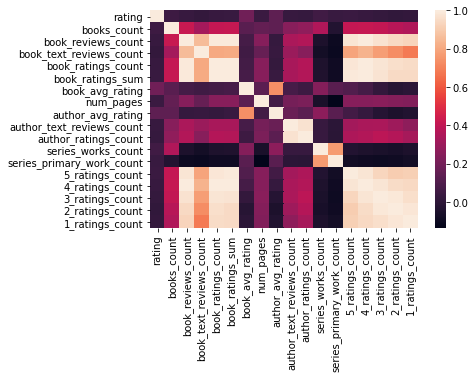

In [21]:
sns.heatmap(df.corr())

The user rating is mostly correlated with the average rating of the book and average rating of the author, but it's certainly not strong! This is very suprsing and not as hypothesized.

The number of different book versions is correlated with multiple different features. The star ratings count is very correlated with the reviews/ratings counts, which makes sense. The number of text review is much more correlated with 4/5 star and less so for 1 star. 

Interestingly, series data is not really correlated to review counts. But, the number of series the author has published is somewhat correlated to the average book rating. This makes sense because authors who write a succesful series, likely have higher ratings and are able to continue writing as a profession. 

In [23]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numdf = df.select_dtypes(include=numerics)

#### Exploring the more clear correlations: series_work_count and author_avg_rating with use rating of the book (and then series_works_count and author_avg_rating).

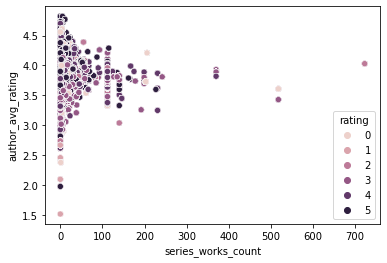

In [27]:
sns.scatterplot(data = df,x='series_works_count',y='author_avg_rating',hue='rating')

Not much here, but could be skewed due to the outliers. 

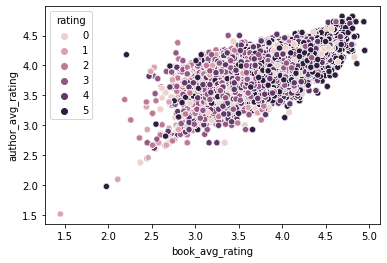

In [28]:
sns.scatterplot(data = df,x='book_avg_rating',y='author_avg_rating',hue='rating')

The average book rating and average author rating have a postive correlation and ratings do trend with that correlation from low to high. 

In [31]:
df[df.series_works_count < 100]

,user_id,book_id,review_id,rating,books_count,book_reviews_count,book_text_reviews_count,book_ratings_count,book_ratings_sum,book_avg_rating,...,author_ratings_count,series_works_count,series_id,series_primary_work_count,5_ratings_count,4_ratings_count,3_ratings_count,2_ratings_count,1_ratings_count,work_id
0,8842281e1d1347389f2ab93d60773d4d,22034,a1d60ab6388dc4f75de2782cf0d8f4d3,5,269,404180,5995,273823,1193941,4.36,...,340063,7.0,215000,7.0,149783,84807,30275,6015,2943,266624
1,bafc2d50014200cda7cb2b6acd60cd73,22034,d5b789f1c8f568ef6bef74180ed2240a,5,269,404180,5995,273823,1193941,4.36,...,340063,7.0,215000,7.0,149783,84807,30275,6015,2943,266624
2,0ef32090550901ead25cb0ea21c4d36b,22034,6e6fa664bac04ceca153b7759ff39635,4,269,404180,5995,273823,1193941,4.36,...,340063,7.0,215000,7.0,149783,84807,30275,6015,2943,266624
6,184ed2313b75f70e1b4ddec3fafafe15,22034,d134d615265a4c474fbc872aced82892,5,269,404180,5995,273823,1193941,4.36,...,340063,7.0,215000,7.0,149783,84807,30275,6015,2943,266624
8,1afe8b35c5e568e95bc17e5b5cdbfd1b,22034,6eb62d73dc855256dafe12b7a23c0d5c,1,269,404180,5995,273823,1193941,4.36,...,340063,7.0,215000,7.0,149783,84807,30275,6015,2943,266624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514180,9838d282e348dd2d6a830b11e64cef23,2684521,55b43591206dab20dd6ab57f9b710503,3,5,415,20,52,200,3.85,...,2079,0.0,0,0.0,15,18,16,2,1,2709843
9514182,41963d2b20bbaa5ce54e9b962aaa065c,2684521,edab5a007378c68bd2666cda3e6f8008,2,5,415,20,52,200,3.85,...,2079,0.0,0,0.0,15,18,16,2,1,2709843
9514183,079077b80eef58d04ded178b05beb595,2684521,d21a021407ecf96b58c3296bdb0d3532,5,5,415,20,52,200,3.85,...,2079,0.0,0,0.0,15,18,16,2,1,2709843
9514184,9252a1aa97436d21b6776a307142969c,2684521,fbfe233b8e7dee0fd3153b8a14feda05,3,5,415,20,52,200,3.85,...,2079,0.0,0,0.0,15,18,16,2,1,2709843


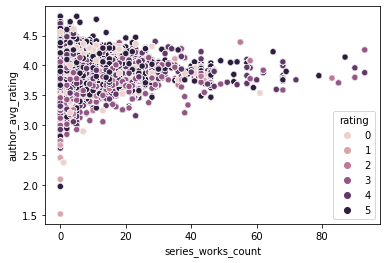

In [32]:
sns.scatterplot(data = df[df.series_works_count < 100],x='series_works_count',y='author_avg_rating',hue='rating')

Not really much here. Higher series counts do have higher ratings, but even close to 0 have plenty of higher ratings. Author average rating is somewhat correlated as the heatmap showed, but still nove definitive. 

#### Looking at some different ratings to combine user rating with book_avg_rating

In [26]:
df_diff=df
df_diff['rating_diff'] = df['rating'] - df['book_avg_rating']
df_diff['abs_rating_diff'] = abs(df['rating'] - df['book_avg_rating'])

<ipython-input-26-ff1fe849a7c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['rating_diff'] = df['rating'] - df['book_avg_rating']
<ipython-input-26-ff1fe849a7c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['abs_rating_diff'] = abs(df['rating'] - df['book_avg_rating'])


In [27]:
df_diff.describe()

,rating,books_count,book_reviews_count,book_text_reviews_count,book_ratings_count,book_ratings_sum,book_avg_rating,num_pages,author_avg_rating,author_text_reviews_count,author_ratings_count,series_works_count,series_primary_work_count,5_ratings_count,4_ratings_count,3_ratings_count,2_ratings_count,1_ratings_count,rating_diff,abs_rating_diff
count,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06,8.585672e+06
mean,3.640901e+00,6.934641e+01,1.483571e+05,4.059165e+03,1.025078e+05,4.055400e+05,3.908440e+00,3.458373e+02,3.924406e+00,4.667160e+04,1.132319e+06,1.696384e+01,1.077477e+01,3.571077e+04,3.743691e+04,2.109970e+04,5.679006e+03,2.581430e+03,-2.675388e-01,8.829784e-01
std,1.257985e+00,1.237040e+02,4.135006e+05,1.188221e+04,3.077422e+05,1.214698e+06,2.357161e-01,1.599546e+02,1.741725e-01,7.309576e+04,2.023005e+06,3.075707e+01,1.932535e+01,1.117890e+05,1.090588e+05,6.118104e+04,1.940392e+04,1.046911e+04,1.234721e+00,9.035825e-01
min,0.000000e+00,1.000000e+00,3.600000e+01,1.000000e+00,1.900000e+01,7.900000e+01,1.450000e+00,0.000000e+00,1.520000e+00,3.000000e+00,2.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.860000e+00,0.000000e+00
25%,3.000000e+00,1.400000e+01,5.360000e+03,2.000000e+02,2.839000e+03,1.095700e+04,3.780000e+00,2.860000e+02,3.830000e+00,3.675000e+03,4.503100e+04,0.000000e+00,0.000000e+00,7.590000e+02,1.082000e+03,6.910000e+02,1.310000e+02,3.400000e+01,-8.700000e-01,2.000000e-01
50%,4.000000e+00,3.700000e+01,2.322300e+04,7.410000e+02,1.339200e+04,5.176900e+04,3.920000e+00,3.490000e+02,3.940000e+00,1.482400e+04,2.540590e+05,7.000000e+00,5.000000e+00,3.784000e+03,5.152000e+03,3.006000e+03,5.560000e+02,1.340000e+02,-2.000000e-02,8.000000e-01
75%,5.000000e+00,7.800000e+01,8.460000e+04,2.300000e+03,5.159900e+04,2.037800e+05,4.060000e+00,4.220000e+02,4.010000e+00,5.634900e+04,1.229320e+06,2.200000e+01,1.600000e+01,1.646200e+04,2.017300e+04,1.122000e+04,2.180000e+03,6.100000e+02,6.500000e-01,1.080000e+00
max,5.000000e+00,1.777000e+03,2.695210e+06,1.225400e+05,2.126047e+06,8.204233e+06,4.950000e+00,3.277000e+03,4.820000e+00,3.674870e+05,1.066672e+07,7.230000e+02,6.830000e+02,8.625630e+05,7.314220e+05,4.664500e+05,1.480720e+05,7.936600e+04,3.550000e+00,4.860000e+00


In [29]:
df_diff_mean = df_diff.groupby('user_id').mean()
df_diff_std = df_diff.groupby('user_id').std()

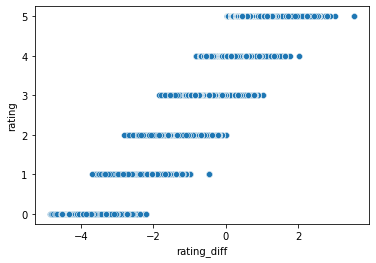

In [28]:
sns.scatterplot(data = df,x='rating_diff',y='rating')

This plot shows a user's rating difference from the book's average rating. If a user gives a low rating, it tends to have a larger disparity to the book's average rating. Most user's who give differring ratings tend to give LOWER ratings except when the rating is >4, which skews to a higher rating. Interestingly 3/4 star ratings are much less differen than 0,1, and 5. 

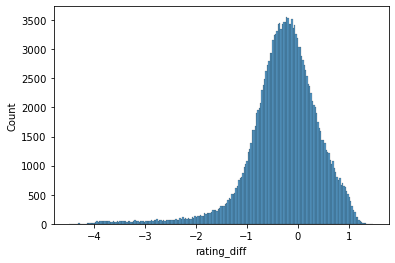

In [30]:
#Looking at distribution a user's average difference
sns.histplot(data=df_diff_mean, x = 'rating_diff')

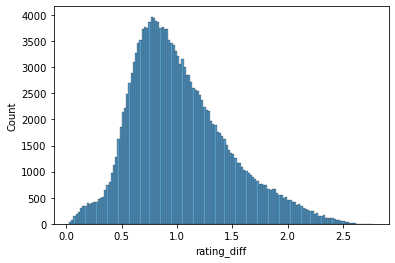

In [32]:
sns.histplot(data=df_diff_std, x = 'rating_diff')

Most ratings are less than 1 from the book's average rating and almost all are within 2 stars. Therefore, most readers rate closely to a book's average rating (which makes sense as it's the average rating). 

#### Let's look at a plot for series and authors for the book's average rating

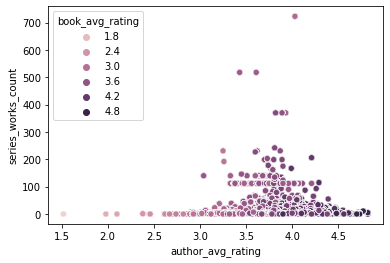

In [11]:
sns.scatterplot(data = df,x='author_avg_rating',y='series_works_count',hue='book_avg_rating')

This plot is extremely informative. It indicates that the books average rating is actually much more likely to follow trends as opposed to looking at what a user specifically rates a book. 

# Conlusion

The data tends to show what we know about looking at people individually: they're hard to predict. However, when aggregating and looking at the numbers, as done with the lst plot, the trends start to come out. If the goal is to predict the user's rating, the book_avg_rating likely tells a lot as almost all users rate within 1-2 stars of the average. However, given user behavious is individualistic, the best approach would be considering the user themselves and the book in question. If we want to predict if a book is good or not, I believe aggregating the user data (average ratings, # reviews, how many have read it) along with other features of the book (author/series information) will be the best approach. 